In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [3]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olixstudios/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




In [5]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [6]:
data = pd.read_csv('./../Dataset/spam_ham_dataset.csv')
data.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
data.shape

(5171, 4)

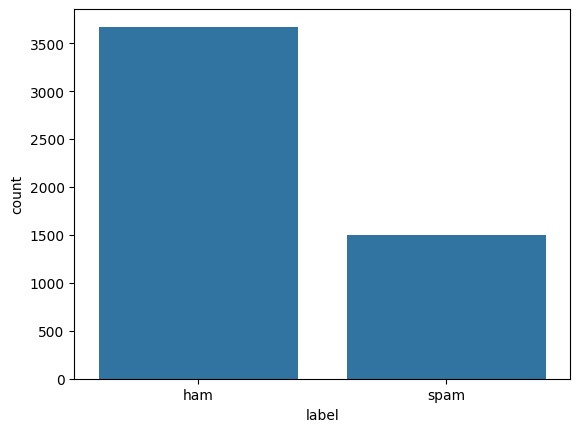

In [8]:
sns.countplot(x='label', data=data)
plt.show()


## Balance the dataset

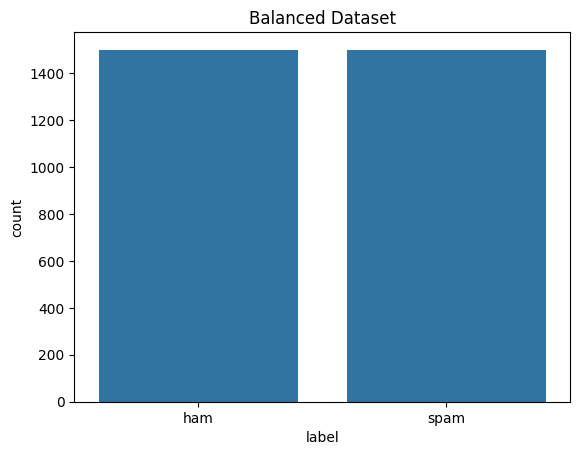

In [9]:
ham_msg = data[data['label'] == 'ham']
spam_msg = data[data['label'] == 'spam']

# Downsample spam messages to match the number of ham messages

ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42)

# Combine the balanced ham messages with the spam messages
balanced_data = pd.concat([ham_msg_balanced,spam_msg]).reset_index(drop=True)

sns.countplot(x='label', data=balanced_data)
plt.title('Balanced Dataset')
plt.show()

## Clean the Text

In [10]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject: ', '')
# balanced_data['text'] = balanced_data['text'].str.replace('Re: ', '')
# balanced_data['text'] = balanced_data['text'].str.replace('Fwd: ', '')
balanced_data['text'] = balanced_data['text'].str.lower()
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco - big cowboy\r\ndarren :\r\ni ' m not s...,0
1,2982,ham,feb 01 prod : sale to teco gas processing\r\ns...,0
2,2711,ham,"california energy crisis\r\ncalifornia  , s p...",0
3,3116,ham,re : nom / actual volume for april 23 rd\r\nwe...,0
4,1314,ham,eastrans nomination changes effective 8 / 2 / ...,0


In [11]:
punctuation = string.punctuation
print(f"Punctuation characters: {punctuation}")
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

balanced_data['text'] = balanced_data['text'].apply(remove_punctuation)
balanced_data

Punctuation characters: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sure...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\nsa...,0
2,2711,ham,california energy crisis\r\ncalifornia  s po...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe a...,0
4,1314,ham,eastrans nomination changes effective 8 2 00...,0
...,...,...,...,...
2993,4381,spam,pictures\r\nstreamlined denizen ajar chased\r\...,1
2994,4979,spam,penny stocks are about timing\r\nnomad interna...,1
2995,4162,spam,anomaly boys from 3881\r\nuosda apaproved mled...,1
2996,4365,spam,slutty milf wants to meet you\r\ntake that \r\...,1


In [12]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

print(f"StopWords: " ,stopwords.words('english'))

balanced_data['text'] = balanced_data['text'].apply(remove_stopwords)
balanced_data.head()

StopWords:  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


## Visualization WordCloud

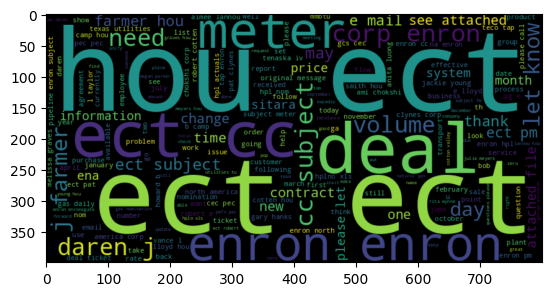

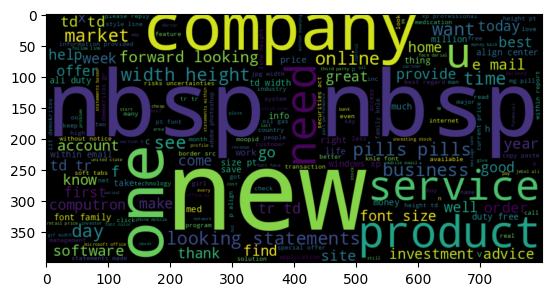

In [13]:
def plot_word_cloud(data,typ):
    email_text = ' '.join(data['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(email_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label'] == 'ham'], 'ham')
plot_word_cloud(balanced_data[balanced_data['label'] == 'spam'], 'spam')

## Tokenization and Padding

In [14]:
train_X, test_X, train_y, test_y = train_test_split(balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42)

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_length = 100
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

train_Y = (train_y == 'spam').astype(int).values
test_Y = (test_y == 'spam').astype(int).values



In [16]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Example vocab size and max sequence length
vocab_size = 5000   # total unique words
embedding_dim = 32
max_len = 100       # maximum input sequence length

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=embedding_dim, 
                    input_length=max_len)) 

model.add(LSTM(16))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Now build the model (optional, happens at compile/fit automatically)
model.build(input_shape=(None, max_len))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 32)        │     1,274,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,278,625 (4.88 MB)

 Trainable params: 1,278,625 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    train_sequences, train_Y,
    validation_data=(test_sequences, test_Y),
    epochs=20,
    batch_size=32,
    callbacks=[lr, es]
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5197 - loss: 0.6861 - val_accuracy: 0.9633 - val_loss: 0.2999 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9338 - loss: 0.2619 - val_accuracy: 0.9283 - val_loss: 0.2073 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9509 - loss: 0.1716 - val_accuracy: 0.9700 - val_loss: 0.1206 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9789 - loss: 0.0965 - val_accuracy: 0.9733 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9838 - loss: 0.0805 - val_accuracy: 0.9383 - val_loss: 0.2807 - learning_rate: 0.0010
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9296 - loss: 0.2771 - val_accuracy: 0.8550 - val_loss: 0.4149 - learning_rate: 0.0010
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9155 - loss: 0.2603 - val_acc

In [19]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9733 - loss: 0.1225
Test Loss: 0.11333886533975601, Test Accuracy: 0.9733333587646484


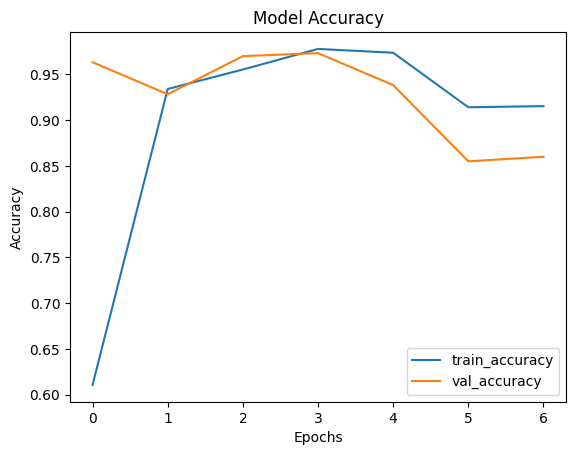

In [20]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  
plt.legend()
plt.show()